# Ridge Classification With Proximal Gradient Descent


In [0]:
%matplotlib inline 
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

## Writing the objective function
We decompose the **objective function $f(w)$** as the sum of **log-likelihood of the data $g(x)$**, plus a **regularization term $ h(x) = \|w\|_{2, c}$**.


In [0]:
def logf(x):
    return np.log(1 + np.exp(x.astype(np.float128)))

def g(X, y, w):
    return np.sum(logf(np.dot(X, w)) - y*np.dot(X, w))

def h(w, d):
    return np.sqrt(np.sum(d*w*w))

def f(X, y, w, d, lambd):
    return g(X, y, w) + lambd * h(w, d)

## Defining Proximal Operator and the Gradient of $g(x)$


In [0]:
def g_grad(X, y, w):
    return np.dot(1 - 1 / np.exp(np.dot(X, w).astype(np.float128)), X) - np.dot(y, X)

def prox(w, d, t, lambd):
    return w - t*lambd / h(w, d) * (d * w)

## Preparing Data

In [0]:
with open('data/X.txt', 'r') as file:
    X = np.array([[int(num) for num in line.split(',')] for line in file])

with open('data/Y.txt', 'r') as file:
    y = np.squeeze(np.array([[int(num) for num in line.split(',')] for line in file]))

with open('data/C.txt', 'r') as file:
    c = np.array([int(line.split(' ')[-1]) for line in file])

## Proximal Gradient Descent with Constant Step Size


In [0]:
d = (1 / np.sqrt(np.repeat(c, c))).astype(np.float128)
lambd = 5
t = 1e-4
max_iter = 1000
n, m = 628, 833
w = np.random.rand(m).astype(np.float128)

In [0]:
obj = []
for i in range(max_iter):
    obj.append(f(X, y, w, d, lambd))
    gradient = g_grad(X, y, w)
    G = (w - prox(w - t*gradient, d, t, lambd)) / t
    w = w - t*G
obj -= obj[-1]

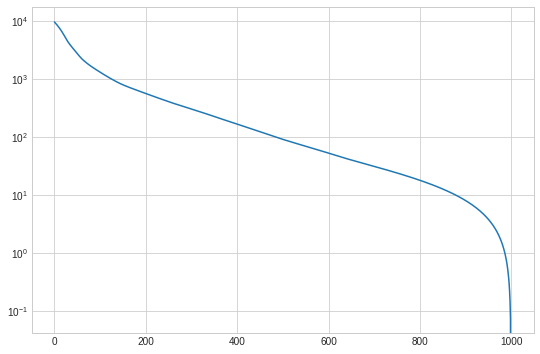

In [8]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9, 6))
plt.yscale('log')
plt.plot(obj)